# Advent of Code Day 3
## No Matter How You Slice It

In [33]:
import numpy as np
from collections import namedtuple
import matplotlib.pyplot as plt

## Part 1

The Elves managed to locate the chimney-squeeze prototype fabric for Santa's suit (thanks to someone who helpfully wrote its box IDs on the wall of the warehouse in the middle of the night). Unfortunately, anomalies are still affecting them - nobody can even agree on how to cut the fabric.

The whole piece of fabric they're working on is a very large square - at least 1000 inches on each side.

Each Elf has made a claim about which area of fabric would be ideal for Santa's suit. All claims have an ID and consist of a single rectangle with edges parallel to the edges of the fabric. Each claim's rectangle is defined as follows:

    The number of inches between the left edge of the fabric and the left edge of the rectangle.
    The number of inches between the top edge of the fabric and the top edge of the rectangle.
    The width of the rectangle in inches.
    The height of the rectangle in inches.

A claim like #123 @ 3,2: 5x4 means that claim ID 123 specifies a rectangle 3 inches from the left edge, 2 inches from the top edge, 5 inches wide, and 4 inches tall. Visually, it claims the square inches of fabric represented by # (and ignores the square inches of fabric represented by .) in the diagram below:

    ...........
    ...........
    ...#####...
    ...#####...
    ...#####...
    ...#####...
    ...........
    ...........
    ...........

The problem is that many of the claims overlap, causing two or more claims to cover part of the same areas. For example, consider the following claims:

    #1 @ 1,3: 4x4
    #2 @ 3,1: 4x4
    #3 @ 5,5: 2x2

Visually, these claim the following areas:

    ........
    ...2222.
    ...2222.
    .11XX22.
    .11XX22.
    .111133.
    .111133.
    ........

The four square inches marked with X are claimed by both 1 and 2. (Claim 3, while adjacent to the others, does not overlap either of them.)

If the Elves all proceed with their own plans, none of them will have enough fabric. How many square inches of fabric are within two or more claims?

In [19]:
Patch = namedtuple('Patch', ['id', 'corner', 'size'])

patches = []

with open('day3_input1.txt') as file:
    for line in file:
        line_split = line.split()
        patches.append(Patch(int(line_split[0].replace('#', '')), [int(i) for i in line_split[2].replace(':', '').split(',')], [int(i) for i in line_split[3].split('x')]))

In [31]:
patches[0].corner[0]

704

In [38]:
fabric = np.zeros((1000, 1000))

for patch in patches:
    sl = np.s_[patch.corner[1]:patch.corner[1]+patch.size[1], patch.corner[0]:patch.corner[0]+patch.size[0]]
    fabric[sl] += 1

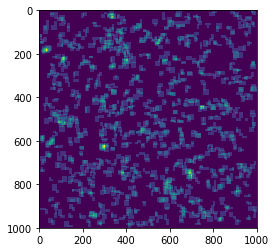

In [39]:
plt.imshow(fabric)

In [51]:
np.sum(fabric > 1)

116920

## Part 2

Amidst the chaos, you notice that exactly one claim doesn't overlap by even a single square inch of fabric with any other claim. If you can somehow draw attention to it, maybe the Elves will be able to make Santa's suit after all!

For example, in the claims above, only claim 3 is intact after all claims are made.

What is the ID of the only claim that doesn't overlap?

In [52]:
for patch in patches:
    sl = np.s_[patch.corner[1]:patch.corner[1]+patch.size[1], patch.corner[0]:patch.corner[0]+patch.size[0]]
    if np.all(fabric[sl] == 1):
        intact = patch.id
        break

In [53]:
print(intact)

382
